In [22]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy
from config import weather_api_key
import time
from datetime import datetime

In [23]:
#create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [24]:
#add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [25]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [26]:
#create an empty list to hold the weather data
city_data = []
#print the beginning of the logging
print("Beginning Data Retrievel                                            ")
print("--------------------------------------------------------------------")

#create counters
record_count = 1
set_count = 1

#starting URL for weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

Beginning Data Retrievel                                            
--------------------------------------------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9ec1048a89f88faa2a255aa63525a10


In [27]:
#loop through all the cities in our list
for i, city in enumerate(cities):
    #group cities in sets of 50 for logging purposes:
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    #create endpoint url with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #log the url, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #add 1 to the record count
    record_count += 1
#run an api request for each of the cities
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | andros town
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | toliary
City not found. Skipping...
Processing Record 7 of Set 1 | mount isa
Processing Record 8 of Set 1 | samokov
Processing Record 9 of Set 1 | ukiah
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | sakakah
Processing Record 12 of Set 1 | hazorasp
Processing Record 13 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | aswan
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 21 of Set 1 | torbay
Processing Record 22 of Set 1 | ge

Processing Record 39 of Set 4 | karratha
Processing Record 40 of Set 4 | cherskiy
Processing Record 41 of Set 4 | vangaindrano
Processing Record 42 of Set 4 | taksimo
Processing Record 43 of Set 4 | bonthe
Processing Record 44 of Set 4 | hokitika
Processing Record 45 of Set 4 | mahadday weyne
City not found. Skipping...
Processing Record 46 of Set 4 | bozdar
Processing Record 47 of Set 4 | shilka
Processing Record 48 of Set 4 | maralal
Processing Record 49 of Set 4 | alice springs
Processing Record 50 of Set 4 | clyde river
Processing Record 1 of Set 5 | ancud
Processing Record 2 of Set 5 | bhag
Processing Record 3 of Set 5 | lompoc
Processing Record 4 of Set 5 | talakan
Processing Record 5 of Set 5 | nouadhibou
Processing Record 6 of Set 5 | flinders
Processing Record 7 of Set 5 | turukhansk
Processing Record 8 of Set 5 | marion
Processing Record 9 of Set 5 | skara
Processing Record 10 of Set 5 | belance
Processing Record 11 of Set 5 | palu
Processing Record 12 of Set 5 | mandi
Proces

Processing Record 26 of Set 8 | lamu
Processing Record 27 of Set 8 | tevaitoa
Processing Record 28 of Set 8 | the valley
Processing Record 29 of Set 8 | weligama
Processing Record 30 of Set 8 | ust-ilimsk
Processing Record 31 of Set 8 | airai
Processing Record 32 of Set 8 | iracoubo
Processing Record 33 of Set 8 | ponta do sol
Processing Record 34 of Set 8 | ornskoldsvik
Processing Record 35 of Set 8 | shawville
Processing Record 36 of Set 8 | taywarah
Processing Record 37 of Set 8 | thinadhoo
Processing Record 38 of Set 8 | quatre cocos
Processing Record 39 of Set 8 | cape girardeau
Processing Record 40 of Set 8 | luancheng
Processing Record 41 of Set 8 | kaohsiung
Processing Record 42 of Set 8 | ercis
Processing Record 43 of Set 8 | saint george
Processing Record 44 of Set 8 | portland
Processing Record 45 of Set 8 | vostok
Processing Record 46 of Set 8 | north ridgeville
Processing Record 47 of Set 8 | yekaterinovka
Processing Record 48 of Set 8 | hasaki
Processing Record 49 of Set 

Processing Record 16 of Set 12 | mtinko
Processing Record 17 of Set 12 | one hundred mile house
City not found. Skipping...
Processing Record 18 of Set 12 | narsaq
Processing Record 19 of Set 12 | asau
Processing Record 20 of Set 12 | kutum
Processing Record 21 of Set 12 | lufilufi
Processing Record 22 of Set 12 | santa cruz
Processing Record 23 of Set 12 | paamiut
Processing Record 24 of Set 12 | nguru
Processing Record 25 of Set 12 | north myrtle beach
Processing Record 26 of Set 12 | camargo
Processing Record 27 of Set 12 | kavaratti
Processing Record 28 of Set 12 | jiroft
City not found. Skipping...
Processing Record 29 of Set 12 | yining
Processing Record 30 of Set 12 | cockburn town
Processing Record 31 of Set 12 | taunggyi
Processing Record 32 of Set 12 | businga
Processing Record 33 of Set 12 | kaeo
Processing Record 34 of Set 12 | marawi
Processing Record 35 of Set 12 | pala
Processing Record 36 of Set 12 | kishi
Processing Record 37 of Set 12 | shimanovsk
Processing Record 38

In [28]:
#convert the array of dictionaries to a dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,60.48,48,5,13.94,AU,2022-05-04 02:14:32
1,Port Alfred,-33.5906,26.8910,61.18,96,12,7.49,ZA,2022-05-04 02:15:28
2,Andros Town,24.7000,-77.7667,76.96,77,4,11.88,BS,2022-05-04 02:15:28
3,Mataura,-46.1927,168.8643,62.47,56,15,2.21,NZ,2022-05-04 02:15:29
4,Avarua,-21.2078,-159.7750,82.45,78,100,6.91,CK,2022-05-04 02:15:29
5,Mount Isa,-20.7333,139.5000,83.97,28,0,6.91,AU,2022-05-04 02:15:30
6,Samokov,42.3333,23.5500,32.68,91,16,3.49,BG,2022-05-04 02:14:30
7,Ukiah,39.1502,-123.2078,75.09,40,0,5.75,US,2022-05-04 02:12:03
8,Bluff,-46.6000,168.3333,62.80,67,20,1.92,NZ,2022-05-04 02:15:31
9,Sakakah,29.9697,40.2064,74.77,24,4,7.92,SA,2022-05-04 02:15:31


In [30]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2022-05-04 02:14:32,-33.6500,115.3333,60.48,48,5,13.94
1,Port Alfred,ZA,2022-05-04 02:15:28,-33.5906,26.8910,61.18,96,12,7.49
2,Andros Town,BS,2022-05-04 02:15:28,24.7000,-77.7667,76.96,77,4,11.88
3,Mataura,NZ,2022-05-04 02:15:29,-46.1927,168.8643,62.47,56,15,2.21
4,Avarua,CK,2022-05-04 02:15:29,-21.2078,-159.7750,82.45,78,100,6.91


In [31]:
#create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#export the city_data into a csv
city_data_df.to_csv(output_data_file,index_label="City=ID")

In [34]:
#extract relevant fields from the df for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Humidity"]
wind_speed = city_data_df["Wind Speed"]

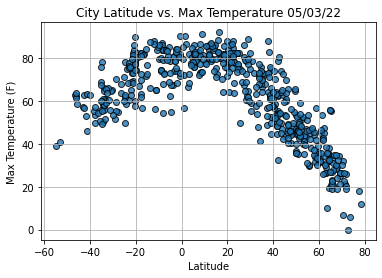

In [38]:
#import time module
import time
#build the scatter plot for latitude vs max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8,label="Cities")
#format graph
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure
plt.savefig("weather_data/Fig1.png")
plt.show()

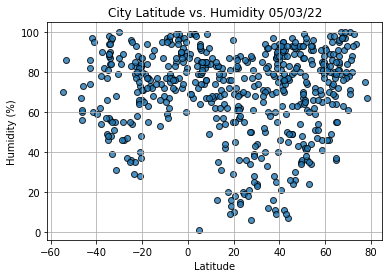

In [42]:
#build the scatter plot for latitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8,label="Cities")
#format graph
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure
plt.savefig("weather_data/Fig2.png")
plt.show()

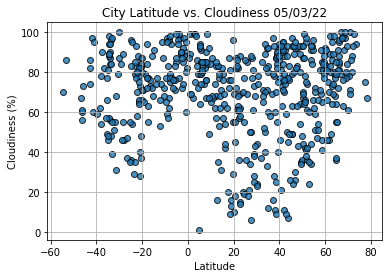

In [43]:
#build the scatter plot for latitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8,label="Cities")
#format graph
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure
plt.savefig("weather_data/Fig3.png")
plt.show()

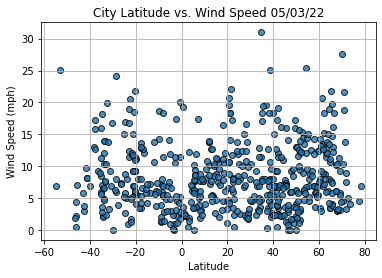

In [44]:
#build the scatter plot for latitude vs wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8,label="Cities")
#format graph
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure
plt.savefig("weather_data/Fig4.png")
plt.show()

In [112]:
#import linregress
from scipy.stats import linregress

#create a function to perform linear regression on the weather data and plot a regression line and the equation with the data
def plot_linear_regression(x_values,y_values,title,y_label,text_coordinates):
    #run regression on hemisphere weather data
    (slope,intercept,r_value,p_value,std_err)=linregress(x_values,y_values)
    
    #calculate the regression line 'y values' from the slope and intercept
    regress_values = x_values*slope + intercept
    #get the equation of the line
    line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))
    #create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    #annotate the text for the line equation
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [113]:
#create northern and southern hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

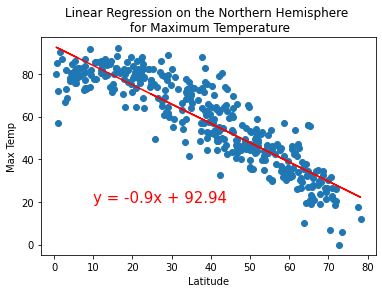

In [114]:
#linear regression on the northern hemisphere (max temp)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,20))

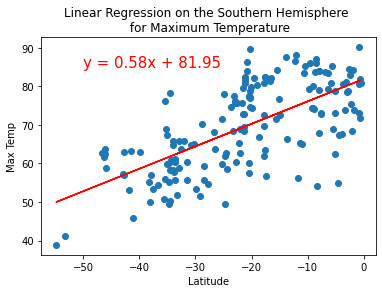

In [115]:
#linear regression on the southern hemisphere (max temp)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,85))

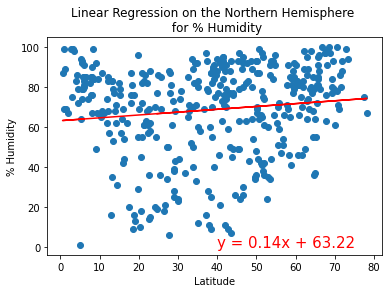

In [116]:
#linear regression on the northern hemisphere (humidity)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,0))

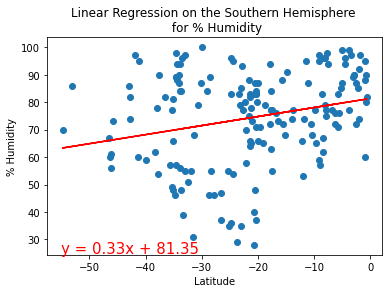

In [117]:
#linear regression on the southern hemisphere (humidity)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,25))

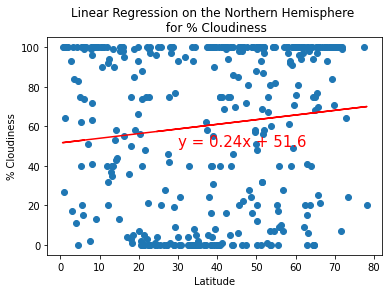

In [118]:
#linear regression on the northern hemisphere (cloudiness)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(30,50))

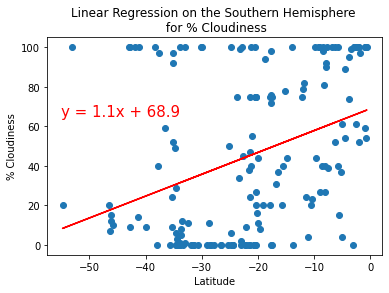

In [119]:
#linear regression on the southern hemisphere (cloudiness)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,65))

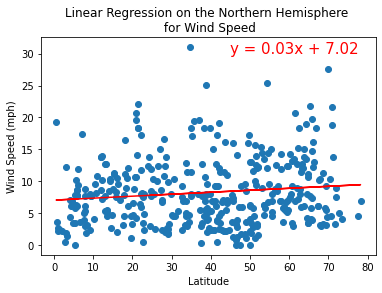

In [120]:
#linear regression on the northern hemisphere (wind speed)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(45,30))

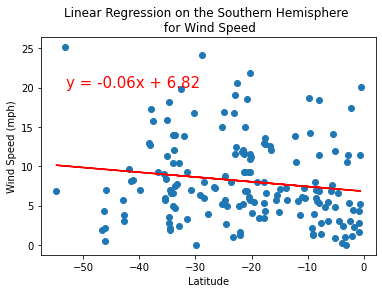

In [121]:
#linear regression on the southern hemisphere (wind speed)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
#call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(-53,20))